# 0. SETUP

In [1]:
!git clone https://github.com/nathanhubens/MultimedIA.git

fatal: destination path 'MultimedIA' already exists and is not an empty directory.


In [2]:
cd MultimedIA/Lesson\ 2

/content/MultimedIA/Lesson 2


In [3]:
!pip install fastai==2.5.1

In [4]:
#hide
from fastai.vision.all import *
from nn import *
import warnings
warnings.filterwarnings('ignore')

In [5]:
cd ../..

/content


In [6]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [7]:
from fastbook import *

# 1. GET DATA

In [8]:
categories = 'Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson'
# Choisis tes catégories

path = Path('cats')
if not path.exists():
  path.mkdir()
  for o in categories:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} ', max_images=100)
    download_images(dest, urls=urls)

In [9]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

In [ ]:
download_url(urls[99], 'images/im.jpg')
im = Image.open('images/im.jpg')
im.thumbnail((256,256))
im

In [10]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
dls = db.dataloaders(path)

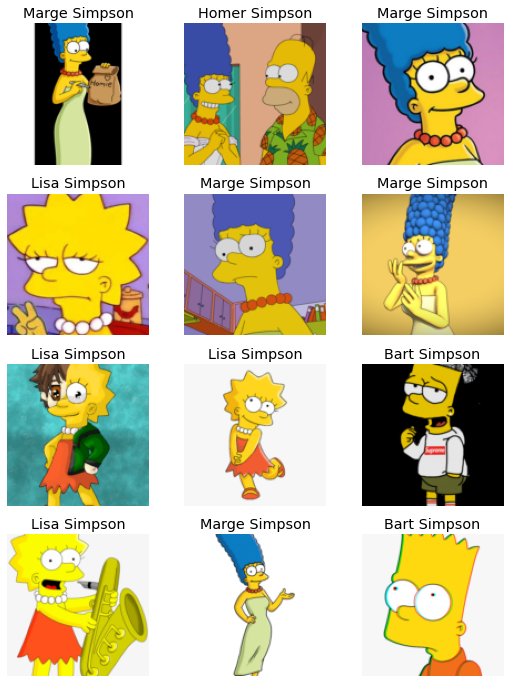

In [12]:
dls.valid.show_batch(max_n=12, nrows=4) 

# 2. TRAIN MODEL

In [19]:
class CNNModel(nn.Module):
    def __init__(self, n_features, output_size):
        super().__init__()
        self.n_features = n_features
        self.conv1 = nn.Conv2d(3, int(n_features), 3, 1, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(int(n_features), int(n_features*2), 3, 1, 1)
        self.conv3 = nn.Conv2d(int(n_features*2), int(n_features*4), 3,1, 1)
        self.pool2 = nn.AdaptiveAvgPool2d((4,4))
        self.fc1 = nn.Linear(int(n_features*4)*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, output_size)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, (self.n_features*4)*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [20]:
model = CNNModel(64, 4)

In [25]:
count_parameters(model)

Number of parameters: 872,960


In [ ]:
learn = Learner(dls, model, metrics=accuracy)
learn.fine_tune(epochs=10)

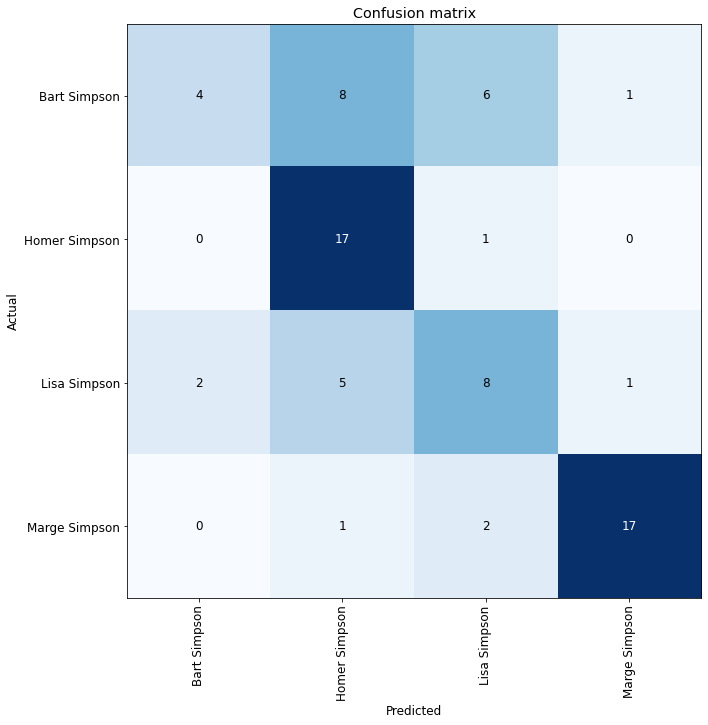

In [22]:
from IPython.core.pylabtools import figsize 
interp = ClassificationInterpretation.from_learner(learn) 
interp.plot_confusion_matrix(figsize=(10,10))

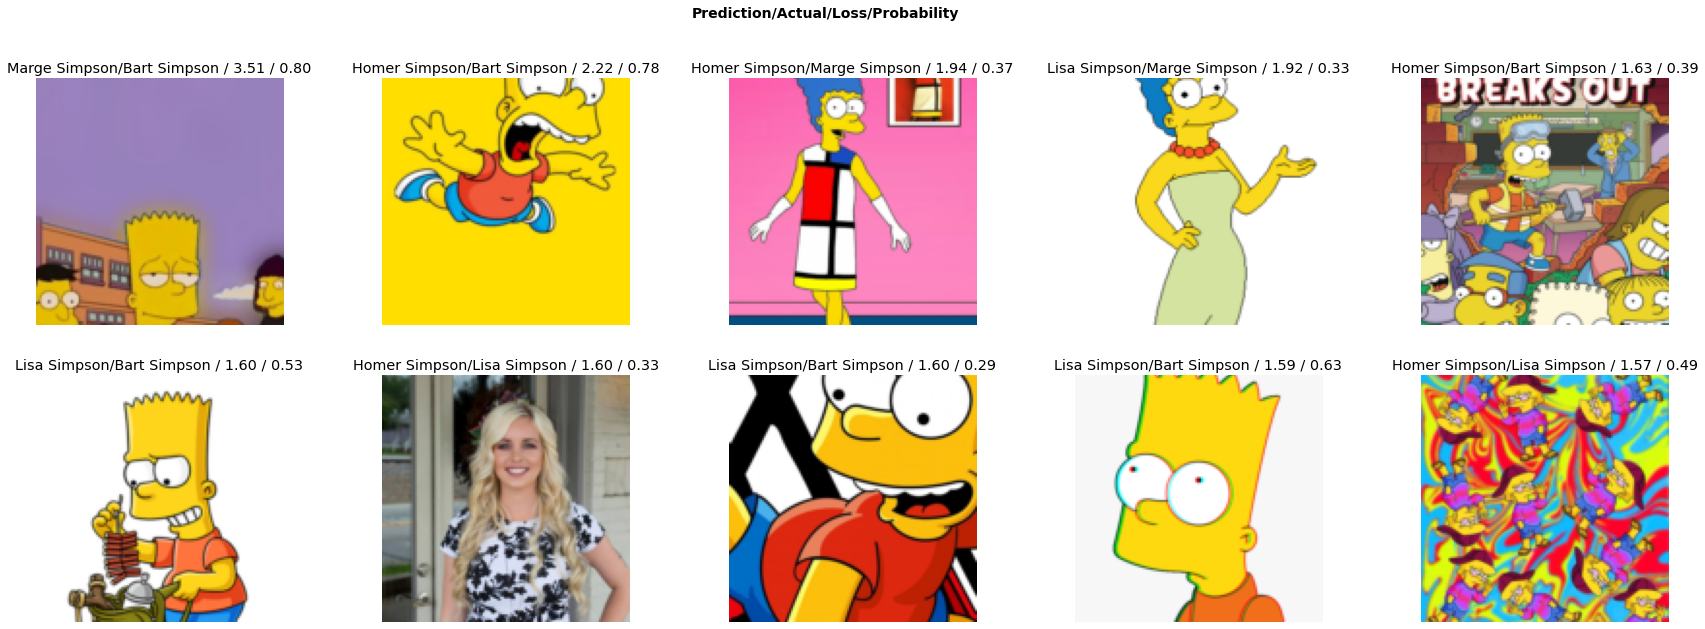

In [23]:
interp.plot_top_losses(10, nrows=2, figsize=(30,10))

## Exercices to try: 

Train your models for more epochs, what happens ? (★☆☆)

Change the batch size, what happens ? (★☆☆)



If you change the values of n_features, what happens ? (★☆☆)

Change the image size, what happens ? (★★☆)

Go to the source code of `nn.py` and get the `CNNModel` code. Remove the non-linearities (ReLU) from the `forward` method. What happens if you train the network now ? (★★☆)

Do you see a relation between the number of parameters and the final accuracy ? (★☆☆)

Try to add more layers to the networks and to see what happens (★★★)